# Measure the radial velocity
This notebook uses the RVFitter class to do an MCMC fit. It looks up the spectral type on Simbad to estimate the temperature, and estimates the log(g) from the spectrum (you should have a Balmer line in there somewhere).

In [1]:
# Import a bunch of stuff
import StarData
import HelperFunctions
import Fitters
import Mamajek_Table
import SpectralTypeRelations
import matplotlib.pyplot as plt
import logging
import triangle
from astropy.io import fits
import numpy as np
import sys
import os

%matplotlib inline

logger = logging.getLogger()
logger.setLevel(logging.INFO)

# Get the HDF5 filename. Might want to change this eventually.
#home = os.environ['HOME']
#sys.path.append('{}/School/Research/CHIRON_data/Chiron-Scripts/'.format(home))
#from Search_slow import hdf5_filename
hdf5_filename = '/Volumes/DATADRIVE/Kurucz_Grid/TS23_grid_full.hdf5'

Module 'anfft' (FFTW Python bindings) could not be imported.
To install it, try running 'easy_install anfft' from the terminal.
Falling back on the slower 'fftpack' module for ND Fourier transforms.


:0: FutureWarning: IPython widgets are experimental and may change in the future.


<IPython.core.display.Javascript object>


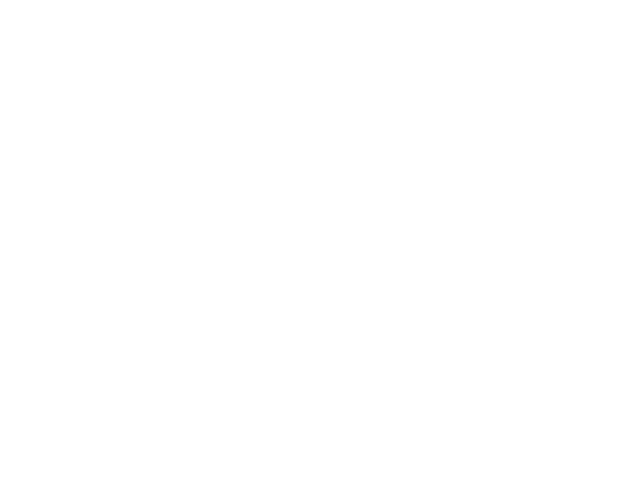

In [2]:
flattened_orders = HelperFunctions.ReadExtensionFits('../20130106/HIP_28691_flattened.fits')
%matplotlib notebook
for order in flattened_orders:
    plt.plot(order.x, order.y, 'k-', alpha=0.4)

In [3]:
# Fit the RV to the flattened spectrum
teff, logg = 13029.7582664, 3.84273512393
reload(Fitters)
flat_fitter = Fitters.RVFitter(flattened_orders, model_library=hdf5_filename, 
                               T=teff, logg=logg, feh=0.0)
#flat_fitter.fit(backend='multinest', n_live_points=1000, basename='RVFitter/HIP109521_20131021-', overwrite=False)

Determine Chunk Log: Wl is 131072


In [4]:
flat_fitter.fit(backend='multinest', n_live_points=1000, basename='RVFitter/HIP28691_20130106-', overwrite=False)

/Users/kgulliks/.PythonModules/GeneralScripts/Fitters.py:1630: UserWarning: vsini too small (56347.8469849). Not broadening!
  linear=True, findcont=False)
/Users/kgulliks/.PythonModules/GeneralScripts/Fitters.py:1630: UserWarning: vsini too small (61459.5413208). Not broadening!
  linear=True, findcont=False)
/Users/kgulliks/.PythonModules/GeneralScripts/Fitters.py:1630: UserWarning: vsini too small (17263.8893127). Not broadening!
  linear=True, findcont=False)
/Users/kgulliks/.PythonModules/GeneralScripts/Fitters.py:1630: UserWarning: vsini too small (83904.2663574). Not broadening!
  linear=True, findcont=False)
/Users/kgulliks/.PythonModules/GeneralScripts/Fitters.py:1630: UserWarning: vsini too small (36103.7254333). Not broadening!
  linear=True, findcont=False)
/Users/kgulliks/.PythonModules/GeneralScripts/Fitters.py:1630: UserWarning: vsini too small (6828.30810547). Not broadening!
  linear=True, findcont=False)
/Users/kgulliks/.PythonModules/GeneralScripts/Fitters.py:1630: U

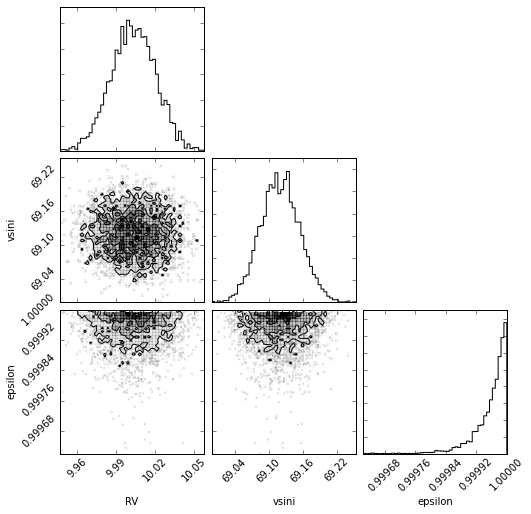

In [5]:
%matplotlib inline
flat_fitter.triangle()

In [6]:
flat_fitter.samples.describe()

,RV,epsilon,lnprob,vsini
count,4802.000000,4802.000000,4802.000000,4802.000000
mean,10.003080,0.999958,-4726413.328631,69.119883
std,0.017158,0.000043,1.406978,0.034871
min,9.946934,0.999622,-4726422.565226,68.998693
25%,9.991472,0.999942,-4726414.049124,69.096499
50%,10.003121,0.999971,-4726413.000564,69.119348
75%,10.014842,0.999988,-4726412.284657,69.143084
max,10.057651,1.000000,-4726411.401565,69.253313


<IPython.core.display.Javascript object>


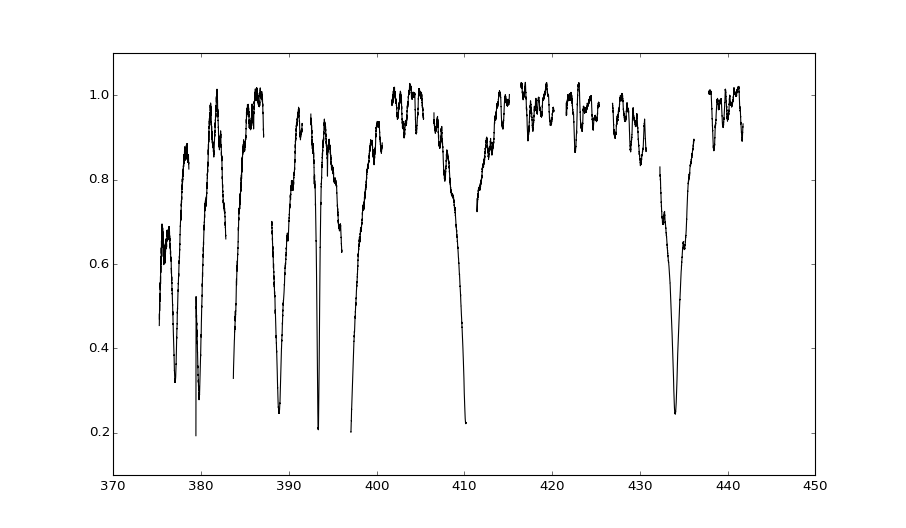

In [7]:
%matplotlib notebook
flat_fitter.plot()